## Problema 1: Newton-Raphson en 2D para Polinomios Cúbicos

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definimos el x y la funcion 
x = sp.symbols('x')
funcion = 3*x**3 - 10*x**2 - 56*x + 50

# Calculamos la primera y segunda derivada
gradiente = sp.diff(funcion, x)
hessiana = sp.diff(gradiente, x)

# Convertimos las funciones a funciones numpy para evaluarlas
funcion_np = sp.lambdify(x, funcion, 'numpy')
gradiente_np = sp.lambdify(x, gradiente, 'numpy')
hessiana_np = sp.lambdify(x, hessiana, 'numpy')

# Implementamos Newton-Raphson
def newton_raphson(gradiente_np, hessiana_np, x_0, alpha , tol = 1e-7, iteraciones = 100):
    x_k = x_0

    for k in range(iteraciones):
        gradiente_x = gradiente_np(x_k)
        hessiana_x = hessiana_np(x_k) 

        if abs(hessiana_x) < 1e-10:
            hessiana_x = 1e-10 if hessiana_x >= 0 else -1e-10

        x_k1 = x_k - alpha * (gradiente_x/hessiana_x)

        if abs(gradiente_np(x_k1)) < tol:
            return x_k1
        
        x_k = x_k1

    return x_k

# Determinamos los diferentes valores iniciales de x_0 y alpha
x_iniciales = [-6, -3, 0, 3, 6]
alphas = [0.2, 0.1]
resultados = []

for x_0 in x_iniciales:
    for alpha in alphas:
        solucion = newton_raphson(gradiente_np, hessiana_np, x_0, alpha)

        valor_funcion = funcion_np(solucion)
        valor_segunda_derivada = hessiana_np(solucion)

        if valor_segunda_derivada > 0:
            tipo = "Minimo local"
        elif valor_segunda_derivada < 0:
            tipo = "Maximo local"
        else:
            tipo = "Punto de inflexion"

        resultados.append((x_0, solucion, valor_funcion, tipo, alpha))
        print(f"x_0 = {x_0}, x* = {solucion:.6f}, f(x*) = {valor_funcion:.6f}, α = {alpha:.3f}, {tipo}")

x_0 = -6, x* = -1.619601, f(x*) = 101.721420, α = 0.200, Maximo local
x_0 = -6, x* = -1.619822, f(x*) = 101.721419, α = 0.100, Maximo local
x_0 = -3, x* = -1.619601, f(x*) = 101.721420, α = 0.200, Maximo local
x_0 = -3, x* = -1.619648, f(x*) = 101.721420, α = 0.100, Maximo local
x_0 = 0, x* = -1.619601, f(x*) = 101.721420, α = 0.200, Maximo local
x_0 = 0, x* = -1.619573, f(x*) = 101.721420, α = 0.100, Maximo local
x_0 = 3, x* = 3.841823, f(x*) = -142.626770, α = 0.200, Minimo local
x_0 = 3, x* = 3.841805, f(x*) = -142.626770, α = 0.100, Minimo local
x_0 = 6, x* = 3.841823, f(x*) = -142.626770, α = 0.200, Minimo local
x_0 = 6, x* = 3.841906, f(x*) = -142.626770, α = 0.100, Minimo local


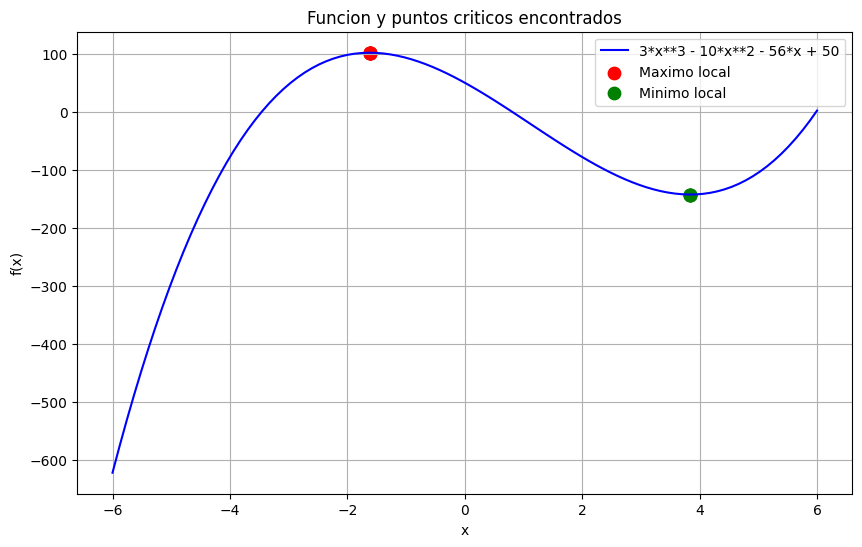

In [ ]:
x_vals = np.linspace(-6, 6, 100)
y_vals = funcion_np(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='3*x**3 - 10*x**2 - 56*x + 50', color='blue')

for (x_0, x_sol, y_sol, tipo, alpha) in resultados:
    if tipo == "Minimo local":
        plt.scatter(x_sol, y_sol, color='green', s=80, label='Minimo local' if 'Minimo local' not in [r[3] for r in resultados[:resultados.index((x_0, x_sol, y_sol, tipo, alpha))]] else "")
    elif tipo == "Maximo local":
        plt.scatter(x_sol, y_sol, color='red', s=80, label='Maximo local' if 'Maximo local' not in [r[3] for r in resultados[:resultados.index((x_0, x_sol, y_sol, tipo, alpha))]] else "")

plt.title("Funcion y puntos criticos encontrados")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

#### Análisis de convergencia

Del comportamiento de la convergencia de la función podemos concluir que el método utilizado es bastante estable y consistente, ya que sin importar los puntos iniciales y el valor de $ α $ empleado, el algoritmo converge hacia los mismos puntos críticos de la función. Para los puntos iniciales negativos y el valor cero, el método siempre converge hacia el punto $ x^* = -1.62 $ correspondiente al máximo local con $ f(x^*) = 101.72 $. Por otro lado, para los puntos iniciales positivos, el método converge hacia el punto $ x^* = 3.84 $, correspondiente al mínimo local con $ f(x^*) = −142.62 $. Además, se observa que los diferentes valores de α probados no afectan significativamente el punto de convergencia final.

## Problema 2: Análisis de Extremos Locales y Globales

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definimos el x y la funcion 
x = sp.symbols('x')
funcion = x**5 - 8*x**3 + 10*x + 6

# Calculamos la primera y segunda derivada
gradiente = sp.diff(funcion, x)
hessiana = sp.diff(gradiente, x)

# Convertimos las funciones a funciones numpy para evaluarlas
funcion_np = sp.lambdify(x, funcion, 'numpy')
gradiente_np = sp.lambdify(x, gradiente, 'numpy')
hessiana_np = sp.lambdify(x, hessiana, 'numpy')

# Implementamos Newton-Raphson
def newton_raphson(gradiente_np, hessiana_np, x_0, alpha , tol = 1e-7, iteraciones = 100):
    x_k = x_0

    for k in range(iteraciones):
        gradiente_x = gradiente_np(x_k)
        hessiana_x = hessiana_np(x_k) 

        if abs(hessiana_x) < 1e-10:
            hessiana_x = 1e-10 if hessiana_x >= 0 else -1e-10

        x_k1 = x_k - alpha * (gradiente_x/hessiana_x)

        if abs(gradiente_np(x_k1)) < tol:
            return x_k1
        
        x_k = x_k1

    return x_k

# Determinamos los diferentes valores iniciales de x_0 y alpha
x_iniciales = [-3, -1, 1, 3]
alphas = [0.2, 0.1]
resultados = []

# Obtenemos los extremos
for x_0 in x_iniciales:
    for alpha in alphas:
        solucion = newton_raphson(gradiente_np, hessiana_np, x_0, alpha)

        valor_funcion = funcion_np(solucion)
        valor_segunda_derivada = hessiana_np(solucion)

        if valor_segunda_derivada > 0:
            tipo = "Minimo local"
        elif valor_segunda_derivada < 0:
            tipo = "Maximo local"
        else:
            tipo = "Punto de inflexion"

        resultados.append((x_0, round(solucion, 2), round(valor_funcion, 4), alpha, tipo))

# Eliminamos los duplicados
unicos = []
for r in resultados:
    if not any(abs(r[0] - p[0]) < 0.05 for p in unicos):
        unicos.append(r)

# Sacamos el maximo y el minimo global 
minimo_global = min(unicos, key=lambda r: r[1])
maximo_global = max(unicos, key=lambda r: r[1])
unicos = [r for r in unicos if r != minimo_global and r != maximo_global]

print("Puntos criticos unicos:")
for r in unicos:
    print(f"x_0 = {r[0]}, x* = {r[1]:.6f}, f(x*) = {r[2]:.6f}, α = {r[3]:.3f}, {r[4]}")

print("")
print("Minimo global:")
print(f"x_0 = {r[0]}, x = {minimo_global[1]:.6f}, f(x) = {minimo_global[2]:.6f}, α = {r[3]:.3f}")

print("")
print("Maximo global:")
print(f"x_0 = {r[0]}, x = {maximo_global[1]:.6f}, f(x) = {maximo_global[2]:.6f}, α = {r[3]:.3f}")

Puntos criticos unicos:
x_0 = -1, x* = -0.680000, f(x*) = 1.570000, α = 0.200, Minimo local
x_0 = 1, x* = 0.680000, f(x*) = 10.430000, α = 0.200, Maximo local

Minimo global:
x_0 = 1, x = -2.080000, f(x) = 18.258800, α = 0.200

Maximo global:
x_0 = 1, x = 2.080000, f(x) = -6.258800, α = 0.200


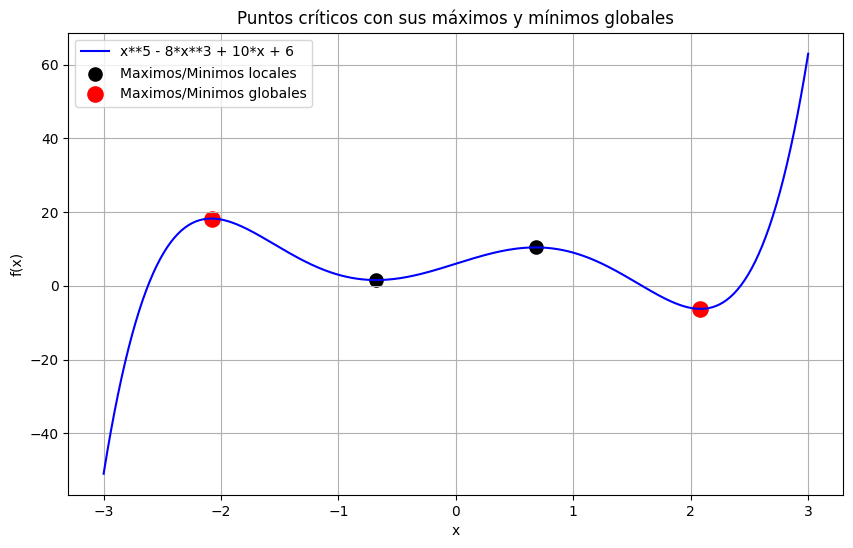

In [4]:
x_vals = np.linspace(-3, 3, 400)
y_vals = funcion_np(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, color='blue', label='x**5 - 8*x**3 + 10*x + 6')

for (x_0, x_sol, y_sol, alpha, tipo) in unicos:
    plt.scatter(x_sol, y_sol, color='black', s=90)

plt.scatter(minimo_global[1], minimo_global[2], color='red', s=120)
plt.scatter(maximo_global[1], maximo_global[2], color='red', s=120)

plt.title("Puntos críticos con sus máximos y mínimos globales")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.scatter([], [], color='black', s=90, label='Maximos/Minimos locales')
plt.scatter([], [], color='red', s=120, label='Maximos/Minimos globales')
plt.legend(loc="best")
plt.grid(True)
plt.show()

#### Análisis de convergencia

Al analizar la convergencia del método sobre esta función, podemos observar que el algoritmo logra identificar de forma correcta los puntos críticos principales. Tenemos un mínimo local en $ x^* = -0.68 $ con $ f(x^*) = 1.57 $ y un máximo local en $ x^* = -0.68 $ con $ f(x^*) = 10.43 $. Además, se identificaron un mínimo global en $ x^* = -2.08 $ con $ f(x^*) = 18.26 $ y un máximo global en $ x^* = -0.68 $ con $ f(x^*) = 10.43 $. Al usar diferentes puntos iniciales y distintos valores de $ α $, fue necesario eliminar puntos críticos duplicados que aparecían debido a la convergencia hacia valores numéricamente muy cercanos, lo que permitió conservar únicamente los puntos únicos para un análisis y una graficación más clara.

## Problema 3: Newton-Raphson Multidimensional

### Parte a: Función de Rosenbrock (3D)

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definimos los simbolos y la funcion 
x = sp.symbols('x')
y = sp.symbols('y')
funcion = (x - 1)**2 + 100*(y - x**2)**2

# Calculamos la primera y segunda derivada
gradiente = [sp.diff(funcion, var) for var in (x, y)]
hessiana = sp.hessian(funcion, (x, y))

# Convertimos las funciones a funciones numpy para evaluarlas
funcion_np = sp.lambdify((x, y), funcion, 'numpy')
gradiente_np = sp.lambdify((x, y), gradiente, 'numpy')
hessiana_np = sp.lambdify((x, y), hessiana, 'numpy')

# Implementamos Newton-Raphson 2D
def newton_raphson_2D(gradiente_np, hessiana_np, x_0, y_0, alpha, tol = 1e-7, iteraciones = 100):
    x_k, y_k = x_0, y_0
    trayectoria = [(x_k, y_k)]

    for k in range(iteraciones):
        gradiente_xy = np.array(gradiente_np(x_k, y_k))
        hessiana_xy = np.array(hessiana_np(x_k, y_k))
        
        if np.linalg.det(hessiana_xy) == 0:
            print(f"La Hessiana no es invertible en la iteracion {k}" )
            break 
        
        delta = np.linalg.solve(hessiana_xy, gradiente_xy)

        x_k1, y_k1 = np.array([x_k, y_k]) - alpha * delta
        trayectoria.append((x_k1, y_k1))

        if np.linalg.norm(gradiente_xy) < tol:
            print(f"Convergencia alcanzada en {k+1} iteraciones")
            return (x_k1, y_k1), trayectoria
        
        x_k, y_k = x_k1, y_k1

    return (x_k, y_k), trayectoria

# Ejecutamos el Newton Raphson en el punto inicial 
alpha = 0.2
(x_min, y_min), trayectoria = newton_raphson_2D(gradiente_np, hessiana_np, 0, 10, alpha)
print(f"x_0 = 0, y_0 = 10, (x*, y*) = ({x_min:.6f}, {y_min:.6f}), f(x*, y*) = {funcion_np(x_min, y_min):.6f}, α = {alpha:.3f}")

x_0 = 0, y_0 = 10, (x*, y*) = (0.999746, 0.999486), f(x*, y*) = 0.000000, α = 0.200


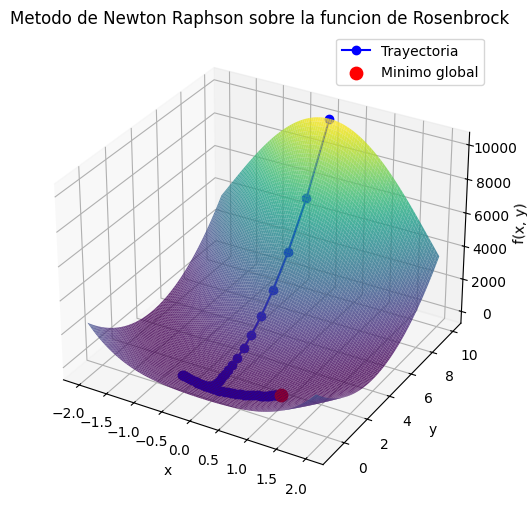

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x_vals = np.linspace(-2, 2, 1000)
y_vals = np.linspace(-1, 10, 1000)
X, Y = np.meshgrid(x_vals, y_vals)
Z = funcion_np(X, Y)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, rstride=10, cstride=10, edgecolor='none')
trayectoria = np.array(trayectoria)
Z_tray = funcion_np(trayectoria[:, 0], trayectoria[:, 1])
ax.plot(trayectoria[:, 0], trayectoria[:, 1], Z_tray, color='blue', marker='o', label='Trayectoria')
ax.scatter(trayectoria[-1, 0], trayectoria[-1, 1], Z_tray[-1], color='red', s=80, label='Minimo global')

ax.set_title('Metodo de Newton Raphson sobre la funcion de Rosenbrock')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
plt.show()

#### Análisis de convergencia

Aunque la convergencia se inició desde el punto inicial $ (x_0, y_0) = (0, 10) $, el cual se encuentra alejado del valle de la función de Rosenbrock, el método logró converger correctamente hacia el mínimo global ubicado en el punto $ (1,1) $. El método de Newton-Raphson alcanzó un punto final de $ (x^*, y^*) = (0.9997, 0.9995)$ con $ f(x^*, y^*) = 0 $. Esto demuestra que el método fue capaz de descender hacia la región del mínimo global partiendo de valores iniciales elevados, y que el valor de $ α = 0.2 $ permitió mantener una estabilidad numérica adecuada para evitar oscilaciones durante el descenso.

###  Parte b: Función en 4D

#### Formulacion matematica 

Entrada: Funcion $( x=(x, y, z) ∈ R^3 )$, puntos iniciales $( x_0, y_0, z_0)$, factor de paso $( α )$, número máximo de iteraciones $( N_{max} )$

Salida: Aproximacion a punto critico $ (x*, y*, z* ) $

Algoritmo: 

1. Iniciar en $ k ← 0 $ $ (x_k, y_k, z_k) $

2. Mientras $ k $ < $ N_{max} $:
    - Calcular el Gradiente $ (▽f\left(x_k,\:y_k,\:z_k\right)\in R^3) $
    - Calcular la Hessiana $ (H\left(f\left(x_k,\:y_k,\:z_k\right)\right)\in R^{3x3}) $
    - Si el determinante de la Hessiana $ (det\left(H\left(f\left(x_k,\:y_k,\:z_k\right)\right)\right)=0) $ es 0, se detiene el algoritmo 
    - Calcular el delta $ (d_k=-H\left(f\left(x_k,\:y_k,\:z_k\right)\right)^{-1}\cdot ▽f\left(x_k,\:y_k,\:z_k\right)) $
    - Actualizar los puntos iniciales $ (x_{k+1},\:y_{k+1},\:z_{k+1}=\left[x_k,\:y_k,\:z_k\right]+α\cdot d_k) $
    - k ← k + 1 $ (x_{k+1},\:y_{k+1},\:z_{k+1}) $ 

3. Detener hasta que la norma del gradiente sea muy pequeña $ (\left|▽f\left(x_k,\:y_k,\:z_k\right)\right|<ε) $ o superar el limite de recursiones $ (k > N_{max}) $

4. Retornar $ \left(x^{*},\:y^{*},\:z^{*}\right)=\left(x_k,\:y_k,\:z_k\right)\: $

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definimos los simbolos y la funcion 
x = sp.symbols('x')
y = sp.symbols('y')
z = sp.symbols('z')
funcion = (x - 1)**2 + (y - 2)**2 + (z - 3)**2

# Calculamos la primera y segunda derivada
gradiente = [sp.diff(funcion, var) for var in (x, y, z)]
hessiana = sp.hessian(funcion, (x, y, z))

# Convertimos las funciones a funciones numpy para evaluarlas
funcion_np = sp.lambdify((x, y, z), funcion, 'numpy')
gradiente_np = sp.lambdify((x, y, z), gradiente, 'numpy')
hessiana_np = sp.lambdify((x, y, z), hessiana, 'numpy')

# Implementamos Newton-Raphson 4D
def newton_raphson_4D(gradiente_np, hessiana_np, x_0, y_0, z_0, alpha, tol = 1e-7, iteraciones = 100):
    x_k, y_k, z_k = x_0, y_0, z_0
    trayectoria = [(x_k, y_k, z_k)]

    for k in range(iteraciones):
        # Calculamos el gradiente
        gradiente_xyz = np.array(gradiente_np(x_k, y_k, z_k))

        # Calculamos la hessiana
        hessiana_xyz = np.array(hessiana_np(x_k, y_k, z_k))
        
        if np.linalg.det(hessiana_xyz) == 0:
            print(f"La Hessiana no es invertible en la iteracion {k}" )
            break 

        delta = np.linalg.solve(hessiana_xyz, gradiente_xyz)

        x_k1, y_k1, z_k1 = np.array([x_k, y_k, z_k]) - alpha * delta
        trayectoria.append((x_k1, y_k1, z_k1))

        if np.linalg.norm(gradiente_xyz) < tol:
            return (x_k1, y_k1, z_k1), trayectoria, k + 1
        
        x_k, y_k, z_k= x_k1, y_k1, z_k1

    return (x_k1, y_k1, z_k1), trayectoria, iteraciones

# Ejecutamos el Newton Raphson en el punto inicial 
alpha = 0.2
(x_min, y_min, z_min), trayectoria, iteraciones = newton_raphson_4D(gradiente_np, hessiana_np, 0, 0, 0, alpha)
trayectoria = np.array(trayectoria)
print(f"x_0 = 0, y_0 = 0, z_0 = 0, (x*, y*, z*) = ({x_min:.6f}, {y_min:.6f}, {z_min:.6f}), f(x*, y*, z*) = {funcion_np(x_min, y_min, z_min):.6f}, α = {alpha:.3f}, Iteraciones = {iteraciones}")

x_0 = 0, y_0 = 0, z_0 = 0, (x*, y*, z*) = (1.000000, 2.000000, 3.000000), f(x*, y*, z*) = 0.000000, α = 0.200, Iteraciones = 83


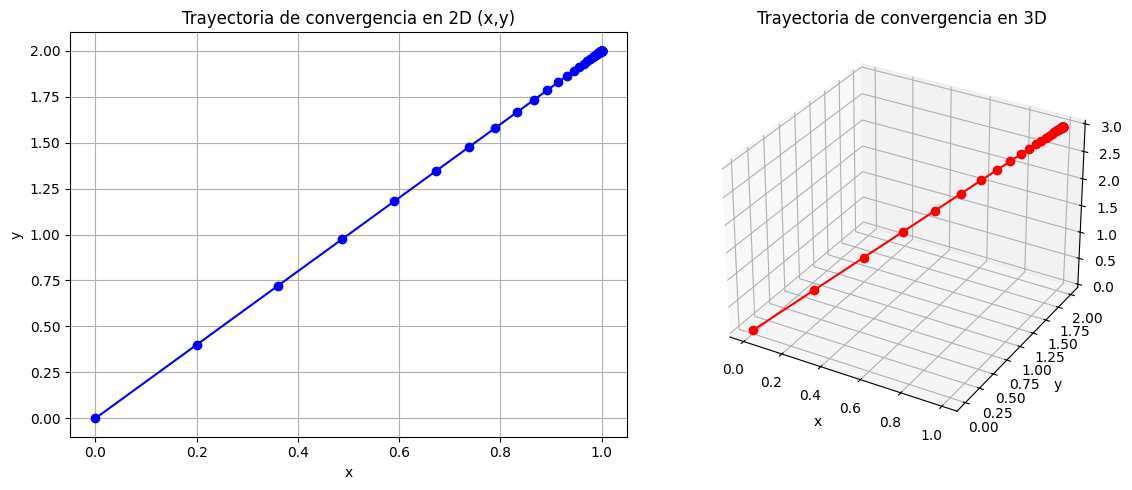

In [6]:
fig = plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(trayectoria[:, 0], trayectoria[:, 1], 'o-', color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trayectoria de convergencia en 2D (x,y)')
plt.grid(True)

ax = fig.add_subplot(122, projection='3d')
ax.plot(trayectoria[:, 0], trayectoria[:, 1], trayectoria[:, 2], 'o-', color='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Trayectoria de convergencia en 3D')

plt.tight_layout()
plt.show()

#### Dificultades computacionales

El metodo de Newton-Raphson presenta varias dificultades al operar en dimensiones altas. Por ejemplo, el calcular y almacenar la matriz Hessiana en cada iteracion represeta un costo computacional realmente elevado. También, si la Hessiana no resulta invertible o esta condicionada, puede el método divergir o tener pasos numéricamente inestables. 

## Problema 4: Gradiente Descendente en Optimización

### Parte A: Implementación de Gradiente descendente en 3-D

In [11]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definimos los simbolos y la funcion 
x = sp.symbols('x')
y = sp.symbols('y')
funcion = (x - 2)**2 + (y + 1)**2 

# Calculamos la primera derivada
gradiente = [sp.diff(funcion, var) for var in (x, y)]

# Convertimos las funciones a funciones numpy para evaluarlas
funcion_np = sp.lambdify((x, y), funcion, 'numpy')
gradiente_np = sp.lambdify((x, y), gradiente, 'numpy')

# Implementamos descenso de gradiente 
def descenso_gradiente(gradiente_np, x_0, y_0, alpha, tol = 1e-7, iteraciones = 200):
    x_k, y_k = x_0, y_0
    trayectoria = [(x_k, y_k)]
    normas = []

    for k in range(iteraciones):
        gradiente_xy = np.array(gradiente_np(x_k, y_k))
        gradiente_xy_norma = np.linalg.norm(gradiente_xy)
        normas.append(gradiente_xy_norma)

        if gradiente_xy_norma < tol:
            return (x_k, y_k), trayectoria, normas, k+1

        x_k, y_k = x_k - alpha * gradiente_xy[0], y_k - alpha * gradiente_xy[1]
        trayectoria.append((x_k, y_k))

    return (x_k, y_k), trayectoria, normas, iteraciones

# Determinamos los diferentes valores iniciales de alpha y los puntos iniciales
x_0, y_0 = 0, 0
alphas = [1.0, 0.5, 0.1, 0.01]
resultados = []

for alpha in alphas:
    (x_min, y_min), trayectoria, normas, iteraciones = descenso_gradiente(gradiente_np, x_0, y_0, alpha)
    f_min = funcion_np(x_min, y_min)
    resultados.append((alpha, x_min, y_min, f_min, trayectoria, iteraciones))
    print(f"x_0 = {x_0}, y_0 = {y_0}, (x*, y*) = ({x_min:.6f}, {y_min:.6f}), f(x*, y*) = {f_min:.6f}, α = {alpha:.3f}, Iteracion = {iteraciones}")


x_0 = 0, y_0 = 0, (x*, y*) = (0.000000, 0.000000), f(x*, y*) = 5.000000, α = 1.000, Iteracion = 200
x_0 = 0, y_0 = 0, (x*, y*) = (2.000000, -1.000000), f(x*, y*) = 0.000000, α = 0.500, Iteracion = 2
x_0 = 0, y_0 = 0, (x*, y*) = (2.000000, -1.000000), f(x*, y*) = 0.000000, α = 0.100, Iteracion = 80
x_0 = 0, y_0 = 0, (x*, y*) = (1.964824, -0.982412), f(x*, y*) = 0.001547, α = 0.010, Iteracion = 200


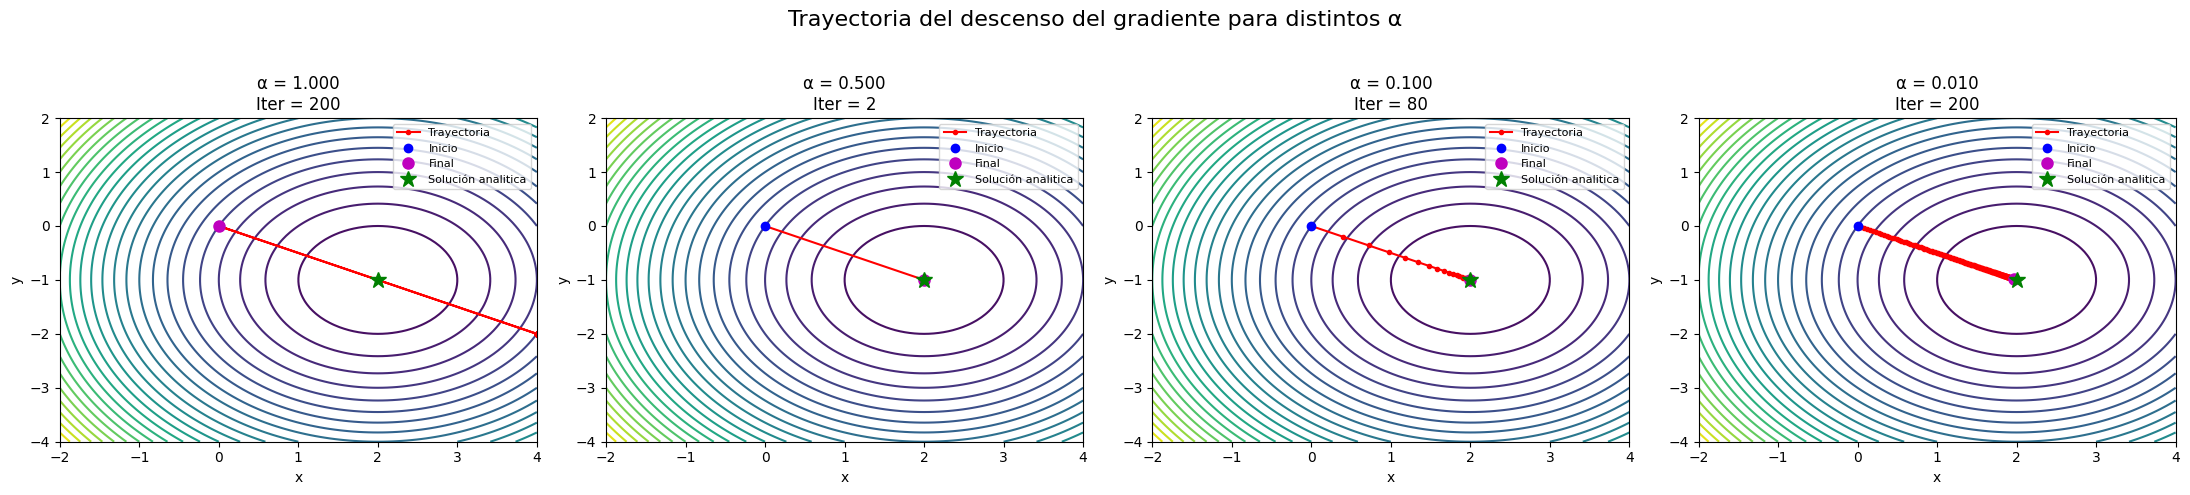

In [12]:
x_vals = np.linspace(-2, 4, 100)
y_vals = np.linspace(-4, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = funcion_np(X, Y)

fig, axes = plt.subplots(1, len(alphas), figsize=(22, 5))

for i, (alpha, x_min, y_min, f_min, trayectoria, iteraciones) in enumerate(resultados):
    ax = axes[i]
    ax.contour(X, Y, Z, levels=30, cmap='viridis')
    trayectoria = np.array(trayectoria)
    ax.plot(trayectoria[:, 0], trayectoria[:, 1], 'r.-', label='Trayectoria')
    ax.plot(x_0, y_0, 'bo', label='Inicio')
    ax.plot(x_min, y_min, 'mo', markersize=8, label='Final')
    ax.plot(2, -1, 'g*', markersize=12, label='Solución analitica')
    ax.set_title(f'α = {alpha:.3f}\nIter = {iteraciones}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(fontsize=8)

plt.suptitle('Trayectoria del descenso del gradiente para distintos α', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Análisis de sensibilidad 

Según el comportamiento observado gracias a las gráficas y al número de iteraciones, es posible decir que el método resulta muy sensible al valor de $ α $. Se observa que con $ α = 1.0 $ el algoritmo no alcanza el mínimo correcto en el límite de iteraciones (se queda en $ f(x^, y^) = 5 $), mientras que con $ α = 0.5 $ converge en solo 2 iteraciones a los valores óptimos; $ α = 0.1 $ también converge, pero requiere muchas más iteraciones (80) con respecto al valor anterior, y con $ α = 0.01 $ la convergencia es muy lenta y no llega al óptimo en 200 iteraciones. Esto ilustra que es necesario un valor intermedio de $ α $ que permita mantener tanto velocidad como estabilidad para encontrar los valores óptimos. Entre los diferentes métodos que se pueden emplear para seleccionar correctamente el $ α $, se encuentran las búsquedas de línea, que reducen $ α $ hasta asegurar el descenso, o los métodos de trust–region, que restringen la longitud del paso según la aproximación cuadrática.

### Parte b: Comparación entre Newton-Raphson y Gradiente Descendente

In [20]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import time

# Definimos los simbolos y la funcion 
x = sp.symbols('x')
y = sp.symbols('y')
funcion = (x - 2)**2 * (y + 2)**2 + (x + 1)**2 + (y - 1)**2

# Calculamos la primera y segunda derivada
gradiente = [sp.diff(funcion, var) for var in (x, y)]
hessiana = sp.hessian(funcion, (x, y))

# Convertimos las funciones a funciones numpy para evaluarlas
funcion_np = sp.lambdify((x, y), funcion, 'numpy')
gradiente_np = sp.lambdify((x, y), gradiente, 'numpy')
hessiana_np = sp.lambdify((x, y), hessiana, 'numpy')

# Implementamos Newton-Raphson 2D
def newton_raphson_2D(gradiente_np, hessiana_np, x_0, y_0, alpha, tol = 1e-7, iteraciones = 100):
    x_k, y_k = x_0, y_0
    trayectoria = [(x_k, y_k)]
    inicio = time.time()

    for k in range(iteraciones):
        gradiente_xy = np.array(gradiente_np(x_k, y_k))
        hessiana_xy = np.array(hessiana_np(x_k, y_k))
        
        if np.linalg.det(hessiana_xy) == 0:
            print(f"La Hessiana no es invertible en la iteracion {k}" )
            break 
        
        delta = np.linalg.solve(hessiana_xy, gradiente_xy)

        x_k1, y_k1 = np.array([x_k, y_k]) - alpha * delta
        trayectoria.append((x_k1, y_k1))

        if np.linalg.norm(gradiente_xy) < tol:
            fin = time.time()
            return (x_k1, y_k1), trayectoria, k + 1, fin - inicio

        x_k, y_k = x_k1, y_k1

    fin = time.time()

    return (x_k, y_k), trayectoria, iteraciones, fin - inicio 

# Implementamos descenso de gradiente 
def descenso_gradiente(gradiente_np, x_0, y_0, alpha, tol = 1e-7, iteraciones = 500):
    x_k, y_k = x_0, y_0
    trayectoria = [(x_k, y_k)]
    normas = []
    inicio = time.time()

    for k in range(iteraciones):
        gradiente_xy = np.array(gradiente_np(x_k, y_k))
        gradiente_xy_norma = np.linalg.norm(gradiente_xy)
        normas.append(gradiente_xy_norma)

        if gradiente_xy_norma < tol:
            fin = time.time()
            return (x_k, y_k), trayectoria, normas, k + 1, fin - inicio

        x_k, y_k = x_k - alpha * gradiente_xy[0], y_k - alpha * gradiente_xy[1]
        trayectoria.append((x_k, y_k))

    fin = time.time()

    return (x_k, y_k), trayectoria, normas, iteraciones, fin - inicio

# Determinamos los diferentes valores iniciales de x_0 y alpha
x_0, y_0 = -2, -3
alphas = [0.5, 0.2, 0.1, 0.01]
resultados = []

for alpha in alphas:
    (x_gradiente, y_gradiente), trayectoria_gradiente, normas_gradiente, iteraciones_gradiente, tiempo_gradiente = descenso_gradiente(gradiente_np, x_0, y_0, alpha)
    (x_newton, y_newton), trayectoria_newton, iteraciones_newton, tiempo_newton = newton_raphson_2D(gradiente_np, hessiana_np, x_0, y_0, alpha)

    valor_funcion_gradiente = funcion_np(x_gradiente, y_gradiente)
    valor_funcion_newton = funcion_np(x_newton, y_newton)

    print(f"\nα = {alpha:.3f}")
    print(f"Descenso Gradiente → x_0 = {x_0}, y_0 = {y_0}, (x*, y*) = ({x_gradiente:.6f}, {y_gradiente:.6f}), f(x*, y*) = {valor_funcion_gradiente:.6f}, Iteraciones = {iteraciones_gradiente}, Tiempo = {tiempo_gradiente:.4f}s")
    print(f"Newton-Raphson → x_0 = {x_0}, y_0 = {y_0}, (x*, y*) = ({x_newton:.6f}, {y_newton:.6f}), f(x*, y*) = {valor_funcion_newton:.6f}, Iteraciones = {iteraciones_newton}, Tiempo = {tiempo_newton:.4f}s")



α = 0.500
Descenso Gradiente → x_0 = -2, y_0 = -3, (x*, y*) = (nan, nan), f(x*, y*) = nan, Iteraciones = 500, Tiempo = 0.0027s
Newton-Raphson → x_0 = -2, y_0 = -3, (x*, y*) = (0.786588, -0.786588), f(x*, y*) = 8.551663, Iteraciones = 39, Tiempo = 0.0011s

α = 0.200
Descenso Gradiente → x_0 = -2, y_0 = -3, (x*, y*) = (nan, nan), f(x*, y*) = nan, Iteraciones = 500, Tiempo = 0.0038s
Newton-Raphson → x_0 = -2, y_0 = -3, (x*, y*) = (-0.618034, -1.618034), f(x*, y*) = 8.000000, Iteraciones = 83, Tiempo = 0.0016s

α = 0.100
Descenso Gradiente → x_0 = -2, y_0 = -3, (x*, y*) = (0.786588, -0.786588), f(x*, y*) = 8.551663, Iteraciones = 12, Tiempo = 0.0000s
Newton-Raphson → x_0 = -2, y_0 = -3, (x*, y*) = (-0.617816, -1.618035), f(x*, y*) = 8.000000, Iteraciones = 100, Tiempo = 0.0020s

α = 0.010
Descenso Gradiente → x_0 = -2, y_0 = -3, (x*, y*) = (-0.620226, -1.618637), f(x*, y*) = 8.000003, Iteraciones = 500, Tiempo = 0.0030s
Newton-Raphson → x_0 = -2, y_0 = -3, (x*, y*) = (0.746485, -3.681754)

<lambdifygenerated-59>:2: RuntimeWarning: overflow encountered in scalar multiply
  return [2*x + (2*x - 4)*(y + 2)**2 + 2, 2*y + (x - 2)**2*(2*y + 4) - 2]
C:\Users\sebas\AppData\Local\Temp\ipykernel_24108\138328656.py:65: RuntimeWarning: invalid value encountered in scalar subtract
  x_k, y_k = x_k - alpha * gradiente_xy[0], y_k - alpha * gradiente_xy[1]
<lambdifygenerated-59>:2: RuntimeWarning: overflow encountered in scalar power
  return [2*x + (2*x - 4)*(y + 2)**2 + 2, 2*y + (x - 2)**2*(2*y + 4) - 2]


## Problema 5: Descenso de Gradiente y Descenso de Gradiente Basado en Momento

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

def forward(x, W1, b1, W2, b2):
    z1 = x @ W1 + b1
    a1 = np.tanh(z1)
    y_pred = a1 @ W2 + b2
    return y_pred, a1, z1

# Decenso de Gradiente
def Descenso_de_Gradiente(x, y, epochs=1000, lr=0.01):
    np.random.seed(0)
    W1 = np.random.randn(1, 10)
    b1 = np.zeros((1, 10))
    W2 = np.random.randn(10, 1)
    b2 = np.zeros((1, 1))
    perdidas = []

    for _ in range(epochs):
        y_pred, a1, z1 = forward(x, W1, b1, W2, b2)
        perdida = np.mean((y_pred - y)**2)
        perdidas.append(perdida)
        dy = 2 * (y_pred - y) / len(x)
        dW2 = a1.T @ dy
        db2 = np.sum(dy, axis=0, keepdims=True)
        da1 = dy @ W2.T
        dz1 = da1 * (1 - np.tanh(z1)**2)
        dW1 = x.T @ dz1
        db1 = np.sum(dz1, axis=0, keepdims=True)

        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2

    y_final, _, _ = forward(x, W1, b1, W2, b2)
    return x, y_final, perdidas

# Decenso de Gradiente con momento
def Descenso_de_Gradiente_Momento(x, y, epochs=1000, lr=0.01, momentum=0.9):
    np.random.seed(0)
    W1 = np.random.randn(1, 10)
    b1 = np.zeros((1, 10))
    W2 = np.random.randn(10, 1)
    b2 = np.zeros((1, 1))

    vW1 = np.zeros_like(W1)
    vb1 = np.zeros_like(b1)
    vW2 = np.zeros_like(W2)
    vb2 = np.zeros_like(b2)

    perdidas = []

    for _ in range(epochs):
        y_pred, a1, z1 = forward(x, W1, b1, W2, b2)
        perdida = np.mean((y_pred - y)**2)
        perdidas.append(perdida)

        dy = 2 * (y_pred - y) / len(x)
        dW2 = a1.T @ dy
        db2 = np.sum(dy, axis=0, keepdims=True)
        da1 = dy @ W2.T
        dz1 = da1 * (1 - np.tanh(z1)**2)
        dW1 = x.T @ dz1
        db1 = np.sum(dz1, axis=0, keepdims=True)

        vW1 = momentum * vW1 - lr * dW1
        vb1 = momentum * vb1 - lr * db1
        vW2 = momentum * vW2 - lr * dW2
        vb2 = momentum * vb2 - lr * db2

        W1 += vW1
        b1 += vb1
        W2 += vW2
        b2 += vb2

    y_final, _, _ = forward(x, W1, b1, W2, b2)
    return x, y_final, perdidas

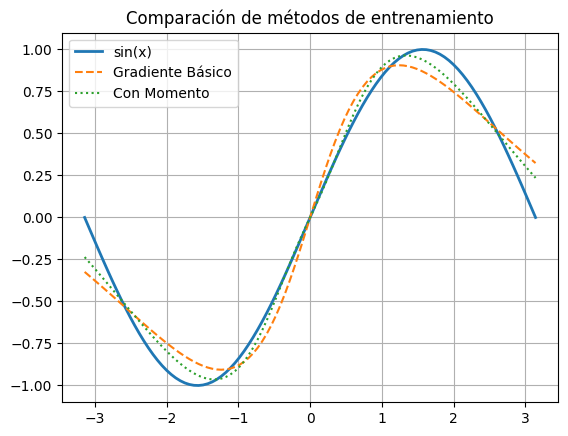

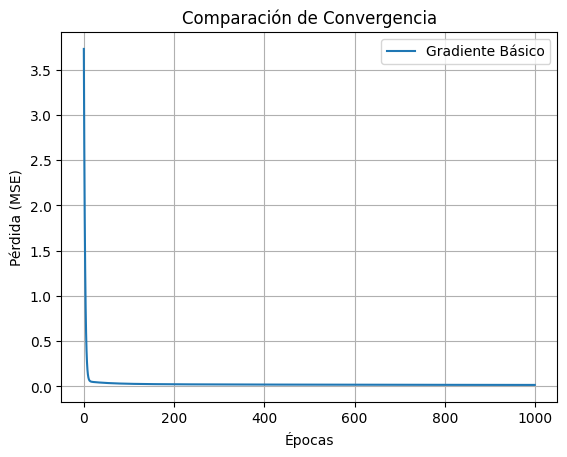

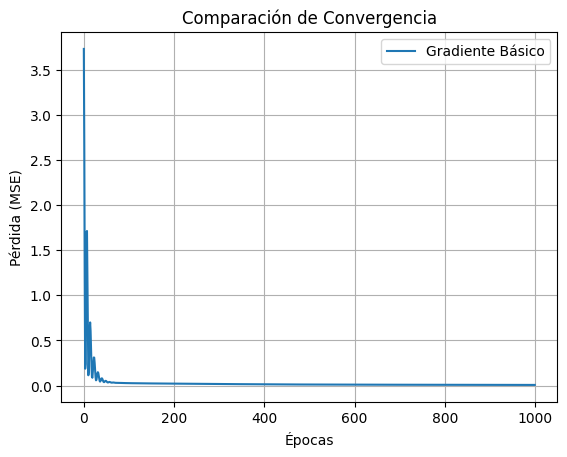

In [ ]:
xx1, y_pred1, perdidas = Descenso_de_Gradiente(x, y, 1000)
xx2, y_pred2, perdidasM = Descenso_de_Gradiente_Momento(x, y, 1000)

plt.plot(x, y, label='sin(x)', linewidth=2)
plt.plot(xx1, y_pred1, label='Gradiente Básico', linestyle='--')
plt.plot(xx2, y_pred2, label='Con Momento', linestyle=':')
plt.legend()
plt.title("Comparación de métodos de entrenamiento")
plt.grid(True)
plt.show()
plt.plot(perdidas, label='Gradiente Básico')
plt.xlabel("Épocas")
plt.ylabel("Pérdida (MSE)")
plt.title("Comparación de Convergencia")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(perdidasM, label='Gradiente Básico')
plt.xlabel("Épocas")
plt.ylabel("Pérdida (MSE)")
plt.title("Comparación de Convergencia")
plt.legend()
plt.grid(True)
plt.show()

#### Análisis de rendimientos 

Como se puede observar en las gráficas, el descenso de gradiente con momento acelera la convergencia al acumular la dirección del gradiente, mientras que el descenso de gradiente básico converge más lentamente, especialmente en las zonas planas. Además, el método básico puede quedarse estancado en mínimos locales, mientras que al añadir el momento, es menos probable que esto ocurra. Como se aprecia en la gráfica, la línea punteada, que representa el método con momento, está más cercana a la línea azul, que corresponde a la función original.